### imports

In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, URL
import pandas as pd

In [2]:
load_dotenv()

host = os.getenv("MYSQL_HOST")
port = os.getenv("MYSQL_PORT")
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PWD")
database = os.getenv("MYSQL_DATABASE")

### Connect to mysql

We will use sqlalchemy instead

In [3]:
# pool = mysql.connector.connect(
#     host=host,
#     port=port,
#     user=user,
#     password=password,
#     database=database
# )

In [4]:
connection_url = URL.create(
    drivername="mysql+pymysql",
    username=user,
    password=password,
    host=host,
    port=port,
    database=database,
)

engine = create_engine(connection_url)

### Get the data

In [5]:
query = "SELECT * FROM smartphones;"
df = pd.read_sql(query, con=engine)
df.head()

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


# Analytics

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### สรุปภาพรวมการตลาด

Text(0, 0.5, 'Mean Price')

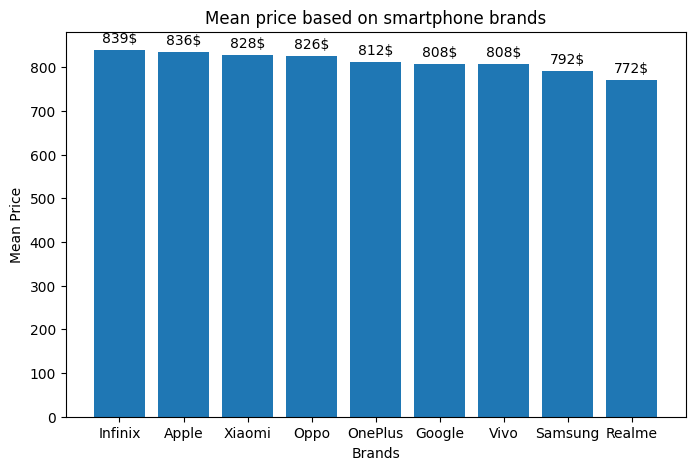

In [8]:
price_mean = df.groupby('brand')['price_usd'].mean()
df_price_mean = price_mean.to_frame().reset_index().sort_values('price_usd', ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    df_price_mean['brand'],
    df_price_mean['price_usd']
)

ax.bar_label(bars, labels=[f"{p:.0f}$" for p in df_price_mean['price_usd']], padding=3)

ax.set_title("Mean price based on smartphone brands")
ax.set_xlabel("Brands")
ax.set_ylabel("Mean Price")

### Correlation

In [9]:
df.corr(numeric_only=True)

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
price_usd,1.000000,-0.023628,0.000730,0.015682,-0.006909,-0.023611,0.014869,-0.001010,NaN
ram_gb,-0.023628,1.000000,0.013488,0.011987,0.024691,0.003696,0.001560,-0.060605,NaN
storage_gb,0.000730,0.013488,1.000000,0.030576,-0.026807,0.012260,0.050683,0.028872,NaN
camera_mp,0.015682,0.011987,0.030576,1.000000,0.004402,-0.057576,0.008465,0.032554,NaN
battery_mah,-0.006909,0.024691,-0.026807,0.004402,1.000000,0.013966,-0.003426,0.011322,NaN
display_size_inch,-0.023611,0.003696,0.012260,-0.057576,0.013966,1.000000,0.053701,0.011403,NaN
charging_watt,0.014869,0.001560,0.050683,0.008465,-0.003426,0.053701,1.000000,0.032803,NaN
rating,-0.001010,-0.060605,0.028872,0.032554,0.011322,0.011403,0.032803,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Some Information

In [15]:
df.head(2)

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


In [17]:
categorical_features = ['brand', 
                        'model', 
                        '5g_support', 
                        'os', 
                        'processor', 
                        'release_month']

numerical_features = ['price_usd', 
                      'ram_gb', 
                      'storage_gb', 
                      'camera_mp', 
                      'battery_mah',
                      'display_size_inch',
                      'charging_watt',
                      'rating',
                      'year']

### Label encoding (df copy)


In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df2 = df.copy()

label = LabelEncoder()
for col in categorical_features:
    df2[col] = label.fit_transform(df2[col])

df2.head(3)

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,4,19,855,16,128,108,6000,6.6,33,1,0,3,3.8,3,2025
1,5,12,618,6,128,64,4500,6.9,100,1,0,7,4.4,1,2025
2,8,663,258,16,64,64,4000,6.8,44,1,0,0,4.1,7,2025


### RandomForestRegressor for price prediction

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
X = df2[['brand', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 
         'display_size_inch', 'charging_watt', '5g_support', 'os', 'processor', 'year']] 
y = df2['price_usd']

In [28]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [29]:
predicted = model.predict(X)

df['predicted_price'] = predicted
print(df[['brand', 'model', 'price_usd', 'predicted_price']])

     brand  model  price_usd  predicted_price
0        4     19        855           841.22
1        5     12        618           692.09
2        8    663        258           461.73
3        7    761        837           847.22
4        0    987        335           563.07
..     ...    ...        ...              ...
995      1    495        961           887.49
996      3    484        158           392.37
997      8    648       1164          1061.42
998      5    359        895           868.62
999      8    298        458           649.48

[1000 rows x 4 columns]
